In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 131543: invalid continuation byte
# when we get this error, try assigning the encoding format to latin

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/KnowledgeHut/knowledgeHut_upgrad_python/datasets/laptop_price.csv", encoding="latin1")
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
df['Price_euros']

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1298     638.00
1299    1499.00
1300     229.00
1301     764.00
1302     369.00
Name: Price_euros, Length: 1303, dtype: float64

In [ ]:
df['Price']=round(df['Price_euros']*87.91).astype('int')
# Price coverted from euros to INR

In [ ]:
df.drop(columns=['Price_euros'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price             1303 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 132.5+ KB


In [ ]:
df.drop(columns=['laptop_ID'], inplace=True)

In [ ]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
df.duplicated().sum()

28

In [ ]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [ ]:
# For every column, we will clean it, perform preprocessing and then perform Univariate analysis
# and then perform bivariate analysis of that column with respect to Output column(Price column)

In [ ]:
df['Company'].value_counts()

Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [ ]:
df.sample(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
464,Lenovo,Thinkpad P51,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,8GB,256GB SSD,Nvidia Quadro M2200M,Windows 10,2.67kg,183732
891,HP,Envy x360,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.42kg,122986


<Axes: >

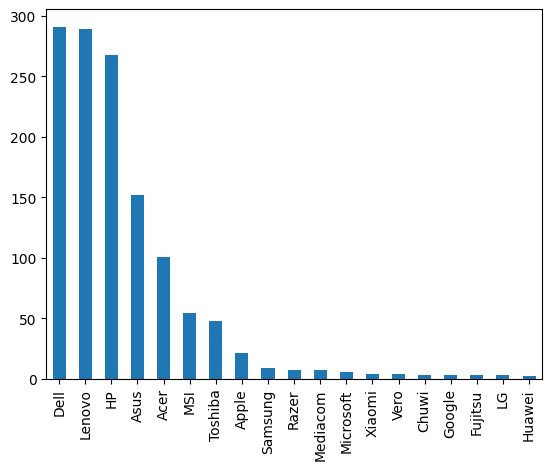

In [ ]:
df['Company'].value_counts().plot(kind='bar')

In [ ]:
df=df[df.groupby('Company').Company.transform('count')>20].copy()

In [ ]:
df.shape

(1224, 12)

In [ ]:
1275-1224

51

<Axes: >

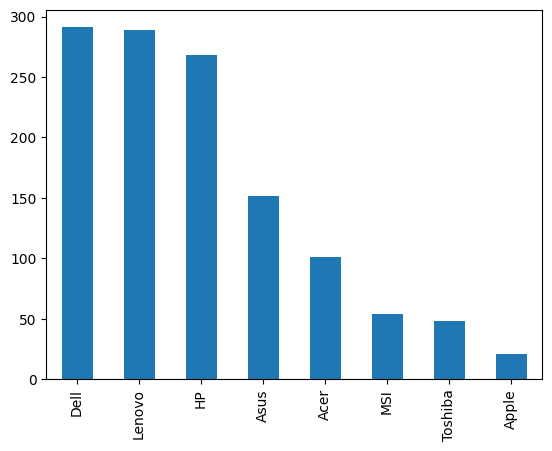

In [ ]:
df['Company'].value_counts().plot(kind='bar')

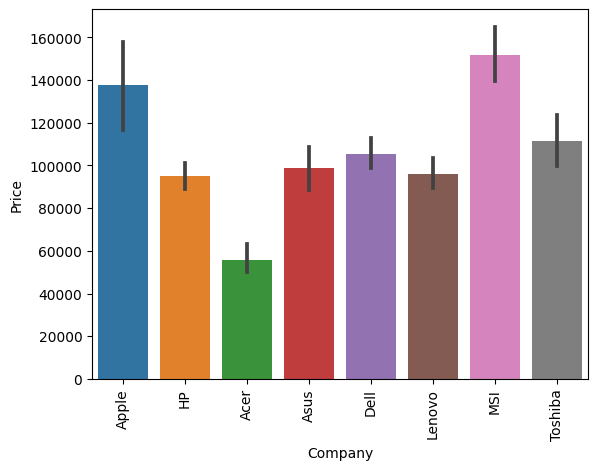

In [ ]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Product'].value_counts()

XPS 13                                 30
Inspiron 3567                          25
250 G6                                 21
Legion Y520-15IKBN                     19
Vostro 3568                            19
                                       ..
Ideapad 520-15IKBR                      1
Thinkpad X260                           1
Rog G752VL-UH71T                        1
Portege X30-D-10L                       1
X553SA-XX031T (N3050/4GB/500GB/W10)     1
Name: Product, Length: 589, dtype: int64

In [ ]:
df[df['Company']=='Dell'].Product.value_counts()

XPS 13            30
Inspiron 3567     25
Vostro 3568       19
Inspiron 5570     18
Alienware 17      15
                  ..
Precision 3510     1
Precision 7720     1
Vostro 5370        1
Latitude 5490      1
Inspiron 7779      1
Name: Product, Length: 62, dtype: int64

In [ ]:
df['Product'].apply(lambda x:x.split()[0]).value_counts()[0:50]

Inspiron      135
IdeaPad        91
ThinkPad       62
Aspire         61
Latitude       52
ProBook        50
EliteBook      45
XPS            39
Thinkpad       37
Vostro         33
Yoga           29
Rog            27
250            25
Legion         23
Probook        22
VivoBook       20
Alienware      19
MacBook        19
Tecra          18
Chromebook     18
ZenBook        17
Portege        15
Spectre        13
Satellite      13
ZBook          13
Precision      11
Omen           11
ROG            11
Elitebook      10
Pavilion        9
Ideapad         8
V110-15ISK      8
Zenbook         8
Envy            7
Swift           7
V310-15ISK      6
GL62M           5
TravelMate      5
V330-15IKB      5
Spin            4
Stream          4
255             4
V310-15IKB      4
GS63VR          4
GS73VR          4
B51-80          4
GL72M           4
Pro             4
GP62M           3
Predator        3
Name: Product, dtype: int64

In [ ]:
df.drop(columns=['Product'],inplace=True)

In [ ]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
85,Dell,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.65kg,118591
572,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,AMD A9-Series A9-9420 3GHz,6GB,256GB SSD,AMD Radeon 530,Windows 10,1.95kg,57054
557,Lenovo,Notebook,17.3,1600x900,Intel Core i7 7500U 2.7GHz,6GB,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.8kg,83427


In [ ]:
df['TypeName'].value_counts()

Notebook              688
Gaming                200
Ultrabook             171
2 in 1 Convertible    114
Workstation            29
Netbook                22
Name: TypeName, dtype: int64

<Axes: >

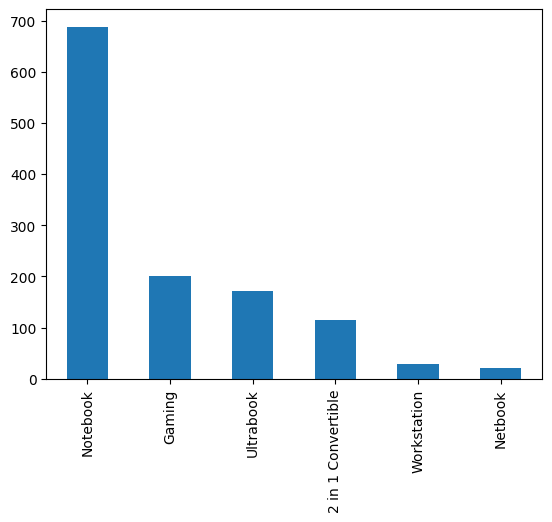

In [ ]:
df['TypeName'].value_counts().plot(kind='bar')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

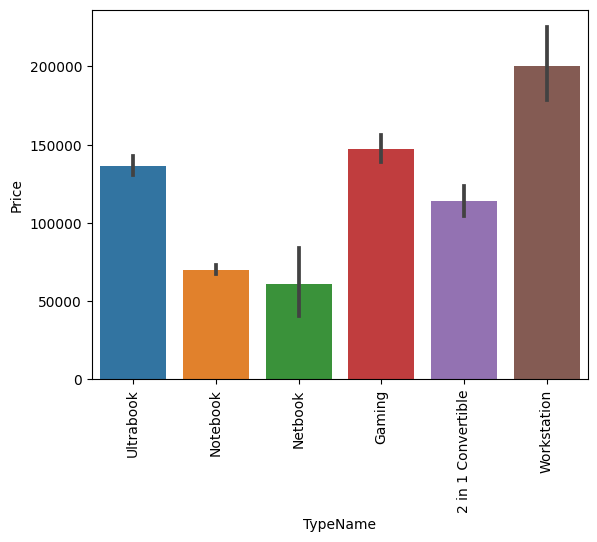

In [ ]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation=90)

<Axes: >

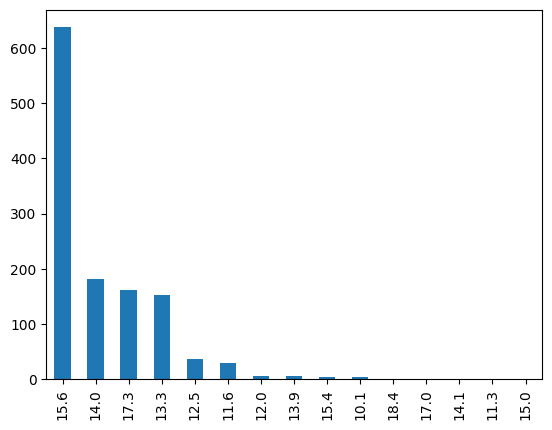

In [ ]:
df['Inches'].value_counts().plot(kind='bar')

<ipython-input-30-70cedb586671>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'],kde=True)


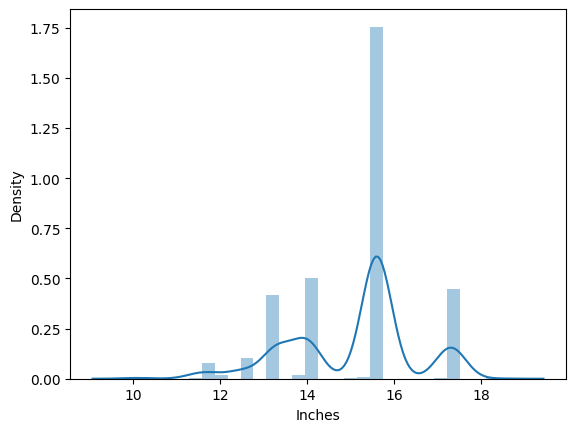

In [ ]:
sns.distplot(df['Inches'],kde=True)
plt.show()

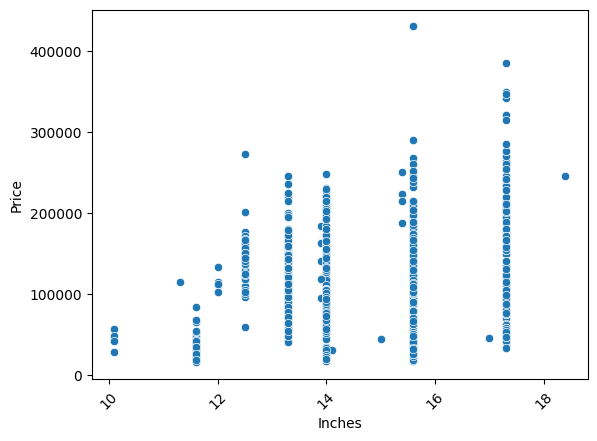

In [ ]:
sns.scatterplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                492
1366x768                                         258
IPS Panel Full HD 1920x1080                      217
IPS Panel Full HD / Touchscreen 1920x1080         48
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     10
4K Ultra HD / Touchscreen 3840x2160                8
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Touchscreen 1920x1200                    4
1440x900                                      

In [ ]:
# X res
# Y res
# Touchscreen
# IPS Panel

In [ ]:
a="IPS Panel Quad HD+ / Touchscreen 3200x1800"

In [ ]:
a

'IPS Panel Quad HD+ / Touchscreen 3200x1800'

In [ ]:
a.split()

['IPS', 'Panel', 'Quad', 'HD+', '/', 'Touchscreen', '3200x1800']

In [ ]:
a.split()[-1]

'3200x1800'

In [ ]:
a.split()[-1].split('x')[0]

'3200'

In [ ]:
a.split()[-1].split('x')[1]

'1800'

In [ ]:
(lambda a:a.split()[-1].split('x')[0])(a)

'3200'

In [ ]:
df['ScreenResolution'].apply(lambda a:a.split()[-1].split('x')[0]).astype('int')

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1270    1920
1271    3200
1272    1366
1273    1366
1274    1366
Name: ScreenResolution, Length: 1224, dtype: int64

In [ ]:
df['X_res']=df['ScreenResolution'].apply(lambda a:a.split()[-1].split('x')[0]).astype('int')
df['Y_res']=df['ScreenResolution'].apply(lambda a:a.split()[-1].split('x')[1]).astype('int')

In [ ]:
df.sample(6)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res
727,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.71kg,57054,1920,1080
1065,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,128173,1920,1080
520,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.2kg,122986,1920,1080
81,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core i5 1.3GHz,8GB,512GB SSD,Intel HD Graphics 615,macOS,0.92kg,132744,2304,1440
287,Asus,Ultrabook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.7kg,85888,1920,1080
578,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.14kg,239906,1920,1080


In [ ]:
a="IPS Panel Quad HD+ / Touchscreen 3200x1800"

In [ ]:
(lambda a:1 if "Touchscreen" in a else 0)(a)

1

In [ ]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda a:1 if "Touchscreen" in a else 0)
df['IPS']=df['ScreenResolution'].apply(lambda a:1 if "IPS" in a else 0)

In [ ]:
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
456,Dell,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.7GHz,8GB,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,179864,1920,1080,0,1
788,Acer,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.2kg,202105,1920,1080,0,1


In [ ]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [ ]:
df.sample(4)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
922,HP,Ultrabook,13.3,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.39kg,101009,3200,1800,1,0
1129,HP,Gaming,17.3,Intel Core i5 6300HQ 2.3GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.35kg,99250,1920,1080,0,1
280,Lenovo,Notebook,17.3,Intel Core i7 7500U 2.7GHz,6GB,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.8kg,75515,1600,900,0,0
775,Asus,2 in 1 Convertible,15.6,Intel Core i7 7500U 2.7GHz,12GB,2TB HDD,Nvidia GeForce 940MX,Windows 10,2.3kg,73756,1920,1080,1,0


In [ ]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     124
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      71
                              ... 
AMD E-Series E2-9000 2.2GHz      1
Intel Core M M3-6Y30 0.9GHz      1
Intel Core i5 2.9GHz             1
Intel Atom x5-Z8350 1.44GHz      1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 111, dtype: int64

In [ ]:
a="Intel Core i7 8550U 1.8GHz"

In [ ]:
a.split()

['Intel', 'Core', 'i7', '8550U', '1.8GHz']

In [ ]:
a.split()[0:3]

['Intel', 'Core', 'i7']

In [ ]:
" ".join(a.split()[0:3])

'Intel Core i7'

In [ ]:
(lambda a:" ".join(a.split()[0:3]))(a)

'Intel Core i7'

In [ ]:
df['Cpu']=df['Cpu'].apply((lambda a:" ".join(a.split()[0:3])))

In [ ]:
df['Cpu'].value_counts()

Intel Core i7               493
Intel Core i5               411
Intel Core i3               134
Intel Celeron Dual           66
Intel Pentium Quad           27
Intel Core M                 16
AMD A9-Series 9420           12
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Celeron Quad            5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9600P          2
Intel Xeon E3-1535M           2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
AMD E-Series 9000e            1
AMD Ryzen 1600                1
AMD E-Series 6110             1
AMD FX 9830P                  1
AMD E-Series E2-6110          1
AMD E-Series E2-9000          1
AMD A6-Series 7310            1
Intel Atom x5-Z8350           1
AMD A12-

In [ ]:
def fetch_processor_name(text):
  if text=="Intel Core i7" or text=="Intel Core i5" or text=="Intel Core i3" or text=="Intel Core M":
    return text
  elif text.split()[0]=="Intel":
    return " ".join(a.split()[0:2])
  elif text.split()[0]=="AMD":
    if text[4]=="A":
      return "AMD A-Series"
    elif text[4]=="E":
      return "AMD E-Series"
    elif text[4]=="F":
      return "AMD F-Series"
    elif text[4]=="R":
      return "AMD Ryzen Series"
    else:
      return "Other AMD Processor"
  else:
    return "Other Processor"

In [ ]:
df['CPU']=df['Cpu'].apply(fetch_processor_name)

In [ ]:
df['CPU'].value_counts()

Intel Core i7       493
Intel Core i5       411
Intel Core i3       134
Intel Core          110
AMD A-Series         45
Intel Core M         16
AMD E-Series          9
AMD Ryzen Series      4
AMD F-Series          2
Name: CPU, dtype: int64

In [ ]:
df.drop(columns="Cpu", inplace=True)

In [ ]:
df.sample(9)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS,CPU
144,HP,Notebook,15.6,4GB,256GB SSD,AMD Radeon R4 Graphics,Windows 10,1.86kg,32439,1366,768,0,0,AMD A-Series
752,Asus,Notebook,15.6,4GB,1TB HDD,Nvidia GeForce GTX 950M,No OS,2.45kg,50900,1366,768,0,0,Intel Core i5
118,Asus,Notebook,17.3,4GB,1TB HDD,Nvidia GeForce 920MX,Windows 10,2kg,49581,1920,1080,0,0,Intel Core i3
90,Asus,Gaming,15.6,8GB,1TB HDD,AMD Radeon RX 560,Windows 10,2.45kg,61449,1920,1080,0,0,AMD F-Series
338,Asus,Notebook,15.6,4GB,1TB HDD,Intel HD Graphics 500,Linux,2kg,24174,1366,768,0,0,Intel Core
453,Lenovo,Notebook,14.0,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.65kg,118239,1920,1080,0,0,Intel Core i5
562,HP,Ultrabook,13.3,16GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.16kg,172743,3200,1800,1,1,Intel Core M
392,Acer,Notebook,15.6,12GB,1TB HDD,Nvidia GeForce MX130,Windows 10,2.2kg,61009,1366,768,0,1,Intel Core i5
696,Lenovo,2 in 1 Convertible,14.0,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.38kg,153755,1920,1080,1,0,Intel Core i7


<Axes: >

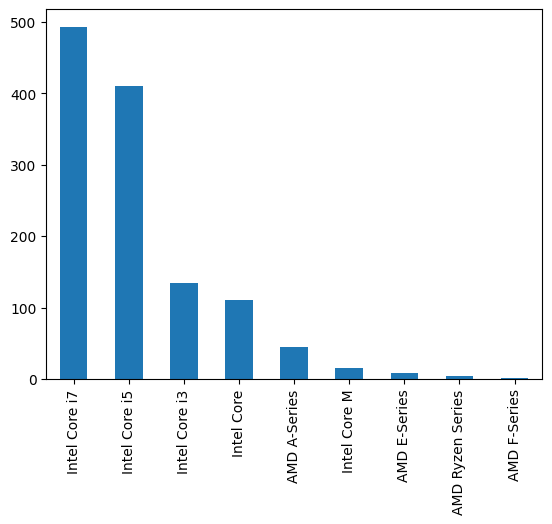

In [ ]:
df['CPU'].value_counts().plot(kind='bar')

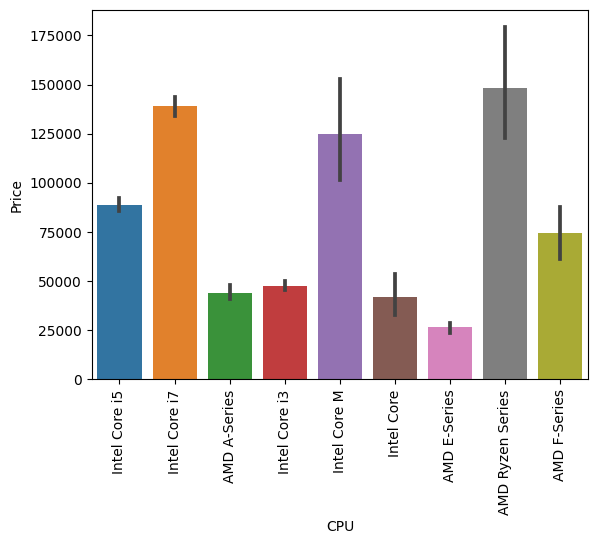

In [ ]:
sns.barplot(x=df['CPU'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Ram']

0        8GB
1        8GB
2        8GB
3       16GB
4        8GB
        ... 
1270     4GB
1271    16GB
1272     2GB
1273     6GB
1274     4GB
Name: Ram, Length: 1224, dtype: object

In [ ]:
df['Ram'].apply(lambda x:x.replace("GB","")).astype('int')

0        8
1        8
2        8
3       16
4        8
        ..
1270     4
1271    16
1272     2
1273     6
1274     4
Name: Ram, Length: 1224, dtype: int64

In [ ]:
df['Ram']=df['Ram'].apply(lambda x:x.replace("GB","")).astype('int')

In [ ]:
df.sample(7)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS,CPU
1049,Asus,Netbook,11.6,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.2kg,25309,1366,768,0,0,Intel Core
715,Lenovo,Notebook,14.0,8,256GB SSD,Nvidia GeForce 920MX,Windows 10,1.87kg,75345,1920,1080,0,1,Intel Core i5
288,Lenovo,Gaming,15.6,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.5kg,103646,1920,1080,0,1,Intel Core i7
1029,HP,Notebook,17.3,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.63kg,94943,1920,1080,0,0,Intel Core i5
407,Dell,Ultrabook,14.0,8,512GB SSD,Intel HD Graphics,Windows 10,1.36kg,147689,1920,1080,0,0,Intel Core i7
346,HP,Notebook,14.0,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.44kg,24527,1366,768,0,0,Intel Core
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,79026,1440,900,0,0,Intel Core i5


<Axes: >

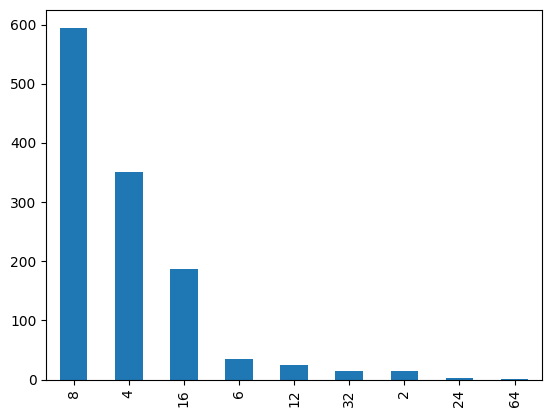

In [ ]:
df['Ram'].value_counts().plot(kind="bar")

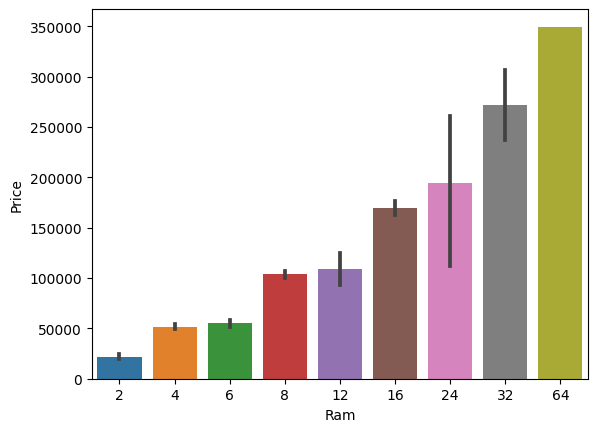

In [ ]:
sns.barplot(x=df['Ram'], y=df['Price'])
plt.show()

In [ ]:
df['Gpu'].value_counts()

Intel HD Graphics 620      265
Intel HD Graphics 520      179
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     65
Nvidia GeForce GTX 1060     45
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
Nvidia GeForce 960M          1
Name: Gpu, Length: 108, dtype: int64

In [ ]:
df['Gpu'].apply(lambda x:x.split()[0])

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1270    Intel
1271    Intel
1272    Intel
1273      AMD
1274    Intel
Name: Gpu, Length: 1224, dtype: object

In [ ]:
df['Gpu']=df['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
df['Gpu'].value_counts()

Intel     666
Nvidia    385
AMD       173
Name: Gpu, dtype: int64

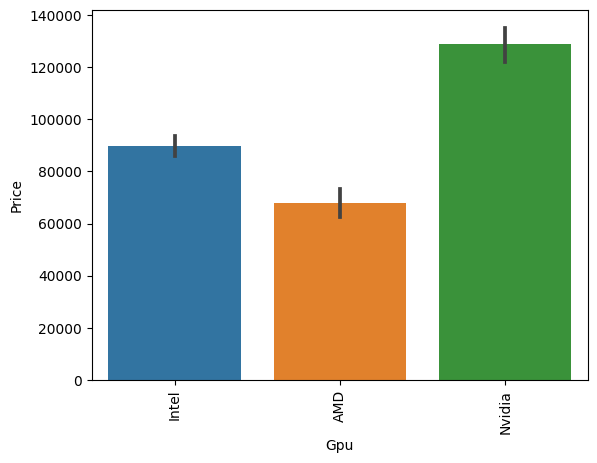

In [ ]:
sns.barplot(x=df['Gpu'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['OpSys'].value_counts()

Windows 10      1011
No OS             63
Linux             58
Windows 7         45
Chrome OS         22
macOS             13
Mac OS X           8
Android            2
Windows 10 S       2
Name: OpSys, dtype: int64

In [ ]:
def os(text):
    if text=="Windows 10" or text=="Windows 10 S":
        return "Windows 10"
    elif text=="macOS" or text=="Mac OS X":
        return "Mac OS"
    elif text=="Windows 7":
        return text
    elif text=="No OS":
        return text
    else:
        return "Linux/Android/Chrome OS"

In [ ]:
df['OpSys']=df['OpSys'].apply(os)

In [ ]:
df['OpSys'].value_counts()

Windows 10                 1013
Linux/Android/Chrome OS      82
No OS                        63
Windows 7                    45
Mac OS                       21
Name: OpSys, dtype: int64

<Axes: >

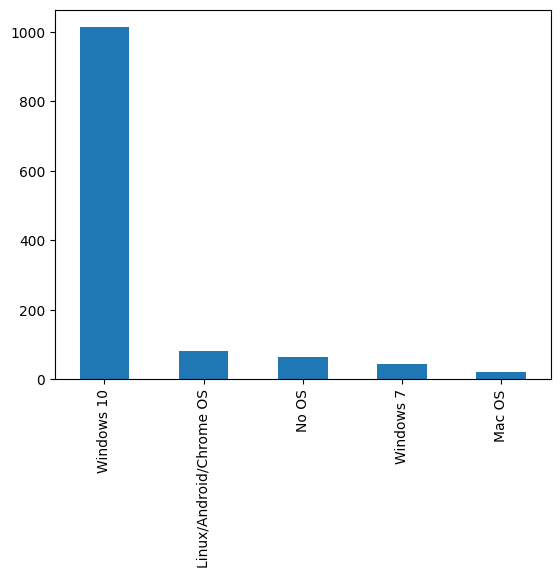

In [ ]:
df['OpSys'].value_counts().plot(kind='bar')

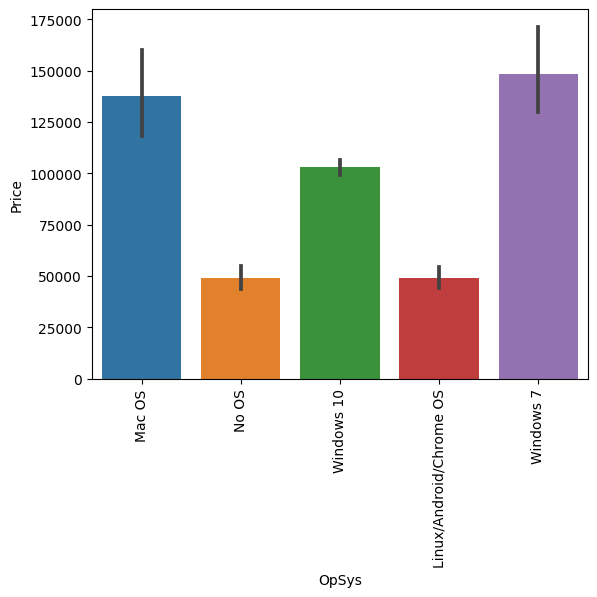

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Weight']

0       1.37kg
1       1.34kg
2       1.86kg
3       1.83kg
4       1.37kg
         ...  
1270     1.8kg
1271     1.3kg
1272     1.5kg
1273    2.19kg
1274     2.2kg
Name: Weight, Length: 1224, dtype: object

In [ ]:
df['Weight']=df['Weight'].apply(lambda x:x.replace("kg","")).astype('float')

In [ ]:
df['Weight'].describe()

count    1224.000000
mean        2.063204
std         0.663863
min         0.690000
25%         1.597500
50%         2.060000
75%         2.320000
max         4.700000
Name: Weight, dtype: float64

<ipython-input-85-406177e58969>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Weight'], kde=True)


<Axes: ylabel='Density'>

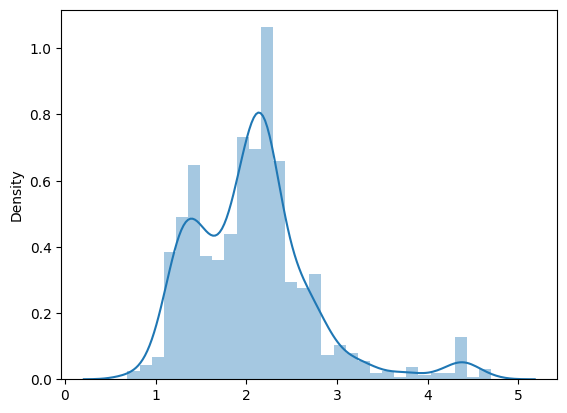

In [ ]:
sns.distplot(x=df['Weight'], kde=True)

<Axes: xlabel='Weight', ylabel='Price'>

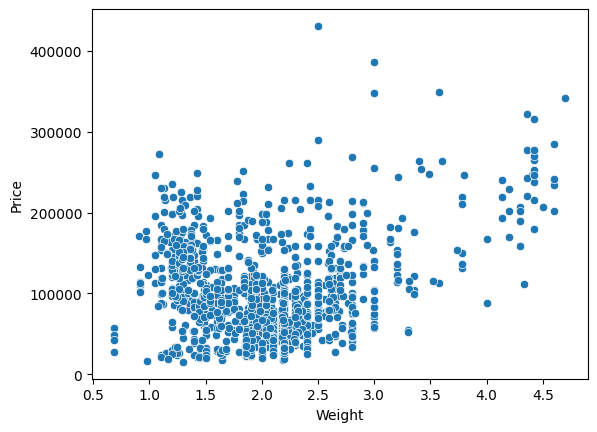

In [ ]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [ ]:
df['Memory'].value_counts()

256GB SSD                        393
1TB HDD                          214
500GB HDD                        124
512GB SSD                        105
128GB SSD +  1TB HDD              93
256GB SSD +  1TB HDD              73
128GB SSD                         71
32GB Flash Storage                29
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           12
64GB Flash Storage                10
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
1.0TB Hybrid                       7
16GB Flash Storage                 6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
32GB SSD                           2
256GB SSD +  256GB SSD             2
512GB SSD +  512GB SSD             1
5

In [ ]:
# SSD
# HDD
# Hybrid
# Flash Storage

In [ ]:
df['Memory']=df['Memory'].astype(str).replace("\.0","",regex=True)

In [ ]:
df['Memory'].value_counts()

256GB SSD                        393
1TB HDD                          215
500GB HDD                        124
512GB SSD                        105
128GB SSD +  1TB HDD              93
256GB SSD +  1TB HDD              73
128GB SSD                         71
32GB Flash Storage                29
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           12
64GB Flash Storage                10
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
1TB Hybrid                         7
16GB Flash Storage                 6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
32GB SSD                           2
128GB HDD                          1
5

In [ ]:
df['Memory']=df['Memory'].str.replace("TB","000")
df['Memory']=df['Memory'].str.replace("GB","")

In [ ]:
df['Memory'].value_counts()

256 SSD                         393
1000 HDD                        215
500 HDD                         124
512 SSD                         105
128 SSD +  1000 HDD              93
256 SSD +  1000 HDD              73
128 SSD                          71
32 Flash Storage                 29
2000 HDD                         16
512 SSD +  1000 HDD              14
1000 SSD                         12
64 Flash Storage                 10
256 SSD +  2000 HDD              10
256 Flash Storage                 8
1000 Hybrid                       7
16 Flash Storage                  6
180 SSD                           5
128 Flash Storage                 4
16 SSD                            3
512 SSD +  2000 HDD               3
1000 SSD +  1000 HDD              2
512 Flash Storage                 2
128 SSD +  2000 HDD               2
256 SSD +  500 HDD                2
256 SSD +  256 SSD                2
32 SSD                            2
128 HDD                           1
512 SSD +  1000 Hybrid      

In [ ]:
new=df['Memory'].str.split('+',n=1,expand=True)
df['first']=new[0]
df['first']=df['first'].str.strip()
df['second']=new[1]

df['Layer1HDD']=df['first'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer1SSD']=df['first'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer1Hybrid']=df['first'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage']=df['first'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['first']=df['first'].str.replace(r'\D','',regex=True)

df['second'].fillna("0",inplace=True)

df['second']=df['second'].str.strip()
df['Layer2HDD']=df['second'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer2SSD']=df['second'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer2Hybrid']=df['second'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage']=df['second'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['second']=df['second'].str.replace(r'\D','',regex=True)

df['first']=df['first'].astype('int')
df['second']=df['second'].astype('int')

df['HDD']=df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD']
df['SSD']=df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD']
df['Hybrid']=df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid']
df['Flash_Storage']=df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage']

df.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)

In [ ]:
df.sample(6)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS,CPU,HDD,SSD,Hybrid,Flash_Storage
382,Asus,Gaming,15.6,8,128 SSD + 1000 HDD,Nvidia,Windows 10,2.30,145491,1920,1080,0,1,Intel Core i7,1000,128,0,0
840,Asus,Gaming,17.3,16,512 SSD + 1000 HDD,Nvidia,Windows 10,2.73,158150,1920,1080,0,0,Intel Core i7,1000,512,0,0
159,Toshiba,Notebook,15.6,4,500 HDD,Intel,Windows 10,2.10,39296,1366,768,0,0,Intel Core i3,500,0,0,0
844,HP,Ultrabook,14.0,8,512 SSD,Intel,Windows 7,1.54,164392,1920,1080,0,0,Intel Core i7,0,512,0,0
146,HP,Ultrabook,12.5,8,512 SSD,Intel,Windows 10,0.97,177051,3840,2160,1,1,Intel Core M,0,512,0,0
379,Acer,Notebook,15.6,8,1000 HDD,Nvidia,Linux/Android/Chrome OS,2.40,74372,1920,1080,0,0,Intel Core i7,1000,0,0,0


In [ ]:
df.drop(columns=['Memory'],inplace=True)

In [ ]:
df.corr(numeric_only=True)

,Inches,Ram,Weight,Price,X_res,Y_res,Touchscreen,IPS,HDD,SSD,Hybrid,Flash_Storage
Inches,1.000000,0.239155,0.824959,0.055330,-0.057739,-0.071772,-0.359497,-0.104090,0.525077,-0.114322,0.050989,-0.230659
Ram,0.239155,1.000000,0.394187,0.726639,0.415731,0.412278,0.094037,0.223322,0.106175,0.589636,0.052774,-0.047725
Weight,0.824959,0.394187,1.000000,0.212038,-0.025155,-0.036765,-0.291506,0.038753,0.503765,-0.063144,0.105129,-0.178962
Price,0.055330,0.726639,0.212038,1.000000,0.553707,0.552964,0.161443,0.289225,-0.093770,0.654751,0.025523,-0.023384
X_res,-0.057739,0.415731,-0.025155,0.553707,1.000000,0.997454,0.320954,0.283969,-0.109044,0.523882,-0.000097,-0.013602
Y_res,-0.071772,0.412278,-0.036765,0.552964,0.997454,1.000000,0.317174,0.294360,-0.115936,0.518090,-0.000967,0.020131
Touchscreen,-0.359497,0.094037,-0.291506,0.161443,0.320954,0.317174,1.000000,0.154500,-0.195492,0.240469,-0.035892,-0.012073
IPS,-0.104090,0.223322,0.038753,0.289225,0.283969,0.294360,0.154500,1.000000,-0.087397,0.228186,-0.013349,0.074771
HDD,0.525077,0.106175,0.503765,-0.093770,-0.109044,-0.115936,-0.195492,-0.087397,1.000000,-0.407685,-0.073848,-0.112475
SSD,-0.114322,0.589636,-0.063144,0.654751,0.523882,0.518090,0.240469,0.228186,-0.407685,1.000000,-0.050250,-0.140474


<Axes: >

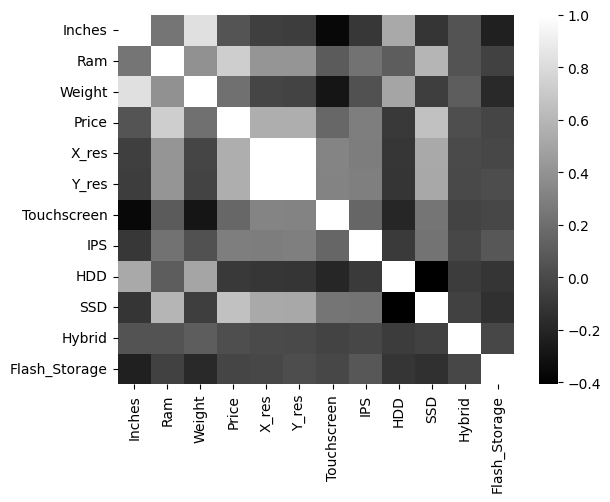

In [ ]:
sns.heatmap(df.corr(numeric_only= True), cmap='gray')

In [ ]:
df.corr(numeric_only=True)['Price']

Inches           0.055330
Ram              0.726639
Weight           0.212038
Price            1.000000
X_res            0.553707
Y_res            0.552964
Touchscreen      0.161443
IPS              0.289225
HDD             -0.093770
SSD              0.654751
Hybrid           0.025523
Flash_Storage   -0.023384
Name: Price, dtype: float64

In [ ]:
df.drop(columns=['Hybrid', 'Flash_Storage'], inplace=True)

In [ ]:
df.corr(numeric_only=True)['Price']

Inches         0.055330
Ram            0.726639
Weight         0.212038
Price          1.000000
X_res          0.553707
Y_res          0.552964
Touchscreen    0.161443
IPS            0.289225
HDD           -0.093770
SSD            0.654751
Name: Price, dtype: float64

In [ ]:
df['HDD'].value_counts()

0       667
1000    398
500     126
2000     32
128       1
Name: HDD, dtype: int64

<Axes: >

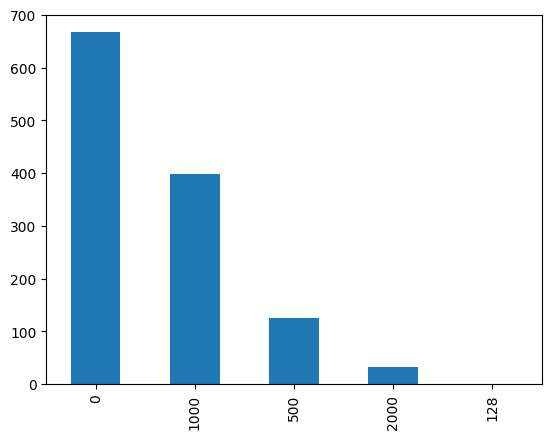

In [ ]:
df['HDD'].value_counts().plot(kind='bar')

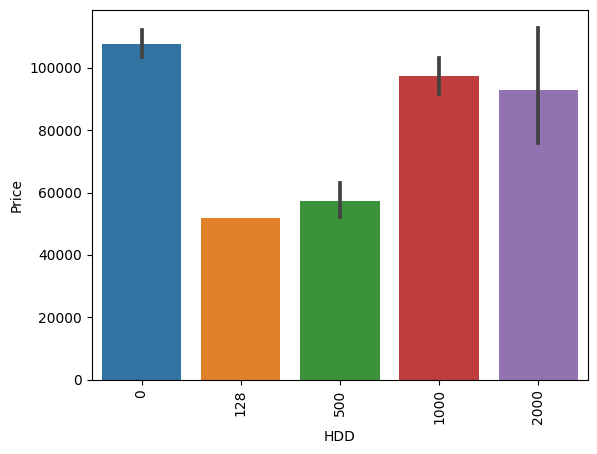

In [ ]:
sns.barplot(x=df['HDD'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['SSD'].value_counts()

256     479
0       425
128     166
512     125
1000     14
180       5
16        3
32        2
64        1
1024      1
768       1
240       1
8         1
Name: SSD, dtype: int64

<Axes: >

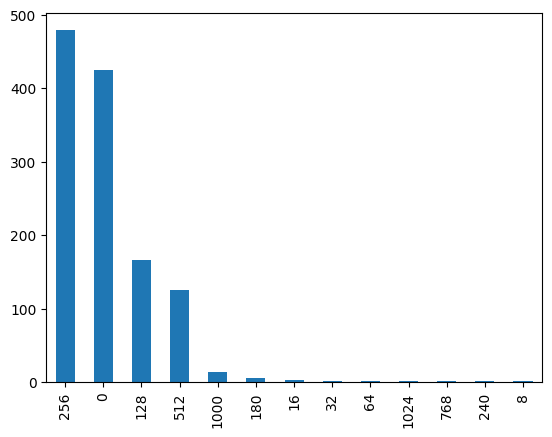

In [ ]:
df['SSD'].value_counts().plot(kind='bar')

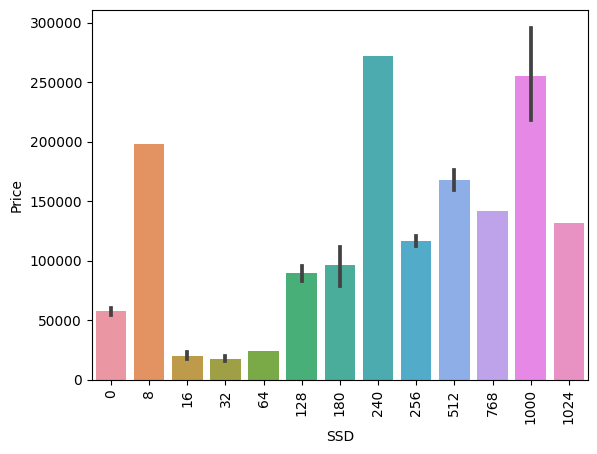

In [ ]:
sns.barplot(x=df['SSD'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.corr(numeric_only=True)['Price']

Inches         0.055330
Ram            0.726639
Weight         0.212038
Price          1.000000
X_res          0.553707
Y_res          0.552964
Touchscreen    0.161443
IPS            0.289225
HDD           -0.093770
SSD            0.654751
Name: Price, dtype: float64

In [ ]:
# X_res: number of pixels placed on the screen horizontally
# Y_res: number of pixels placed on the screen vertically
# screen size
# Pixel Density(ppi)

In [ ]:
df['PPI']=((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']
df['PPI']= round(df['PPI'], 2)

In [ ]:
df.sample(15)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS,CPU,HDD,SSD,PPI
1160,Lenovo,Ultrabook,14.0,8,Intel,Windows 7,1.70,131777,1920,1080,0,0,Intel Core i7,0,256,157.35
636,Dell,Ultrabook,13.3,8,Intel,Windows 10,1.23,164304,3200,1800,1,0,Intel Core i5,0,256,276.05
540,Dell,Ultrabook,13.3,8,Intel,Windows 10,1.20,122986,3200,1800,1,0,Intel Core i7,0,256,276.05
601,HP,Notebook,15.6,4,Intel,Windows 10,2.10,58766,1366,768,0,0,Intel Core i3,500,0,100.45
1056,HP,Notebook,15.6,4,Intel,No OS,1.96,43867,1366,768,0,0,Intel Core i5,500,0,100.45
974,Asus,Gaming,17.3,16,Nvidia,Windows 10,2.73,180207,1920,1080,0,0,Intel Core i7,1000,256,127.34
464,Lenovo,Notebook,15.6,8,Nvidia,Windows 10,2.67,183732,1920,1080,0,0,Intel Core i7,0,256,141.21
842,HP,Notebook,17.3,8,Nvidia,Windows 10,2.63,79998,1600,900,0,0,Intel Core i5,1000,0,106.11
63,Asus,Notebook,14.0,8,Intel,Windows 10,1.40,82723,1920,1080,0,0,Intel Core i5,0,256,157.35
1030,HP,Notebook,14.0,4,Intel,Windows 10,1.64,85536,1366,768,0,0,Intel Core i5,0,256,111.94


In [ ]:
df.corr(numeric_only=True)['Price']

Inches         0.055330
Ram            0.726639
Weight         0.212038
Price          1.000000
X_res          0.553707
Y_res          0.552964
Touchscreen    0.161443
IPS            0.289225
HDD           -0.093770
SSD            0.654751
PPI            0.483787
Name: Price, dtype: float64

In [ ]:
df.drop(columns=['X_res', 'Y_res', 'Inches'], inplace=True)

In [ ]:
df['Touchscreen'].value_counts()

0    1055
1     169
Name: Touchscreen, dtype: int64

<Axes: >

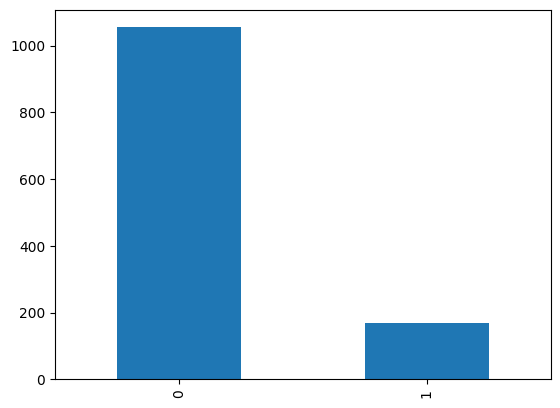

In [ ]:
df['Touchscreen'].value_counts().plot(kind = 'bar')

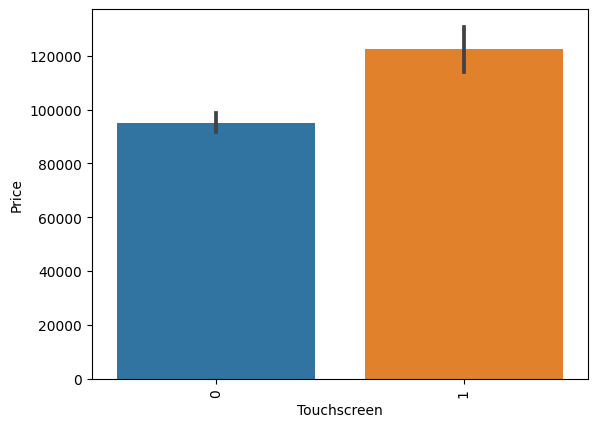

In [ ]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['PPI'].value_counts()

141.21    419
100.45    195
127.34    131
157.35    122
165.63    100
111.94     42
135.09     28
176.23     25
276.05     25
282.42     23
106.11     22
209.80     18
125.37      9
117.83      8
331.26      7
226.98      6
226.42      6
254.67      5
127.68      4
224.17      4
158.48      4
220.53      4
169.78      2
220.84      2
316.97      2
352.47      2
90.58       2
119.72      1
189.91      1
107.99      1
111.14      1
194.95      1
234.98      1
146.86      1
Name: PPI, dtype: int64

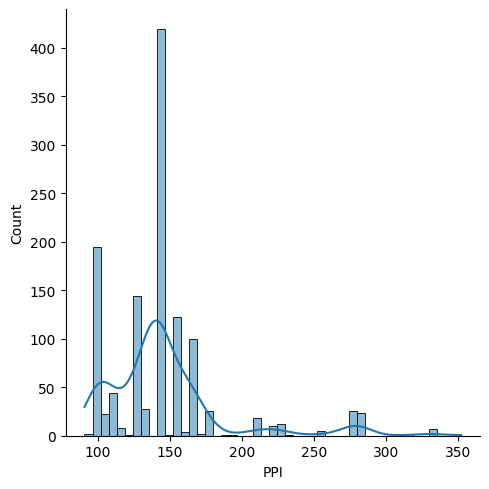

In [ ]:
sns.displot(x=df['PPI'],kde=True)

<Axes: xlabel='PPI', ylabel='Price'>

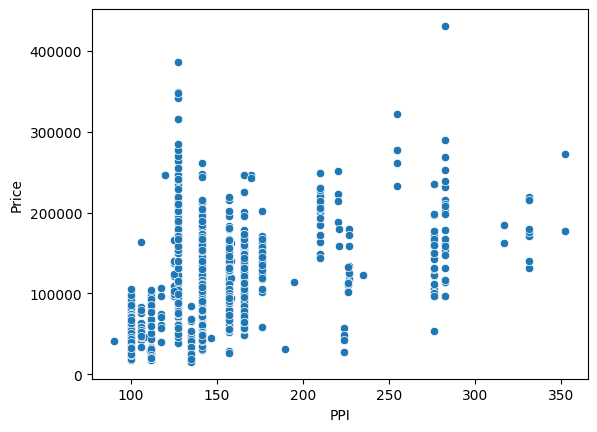

In [ ]:
sns.scatterplot(x=df['PPI'],y=df['Price'])

In [ ]:
df.sample(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,CPU,HDD,SSD,PPI
858,Dell,Notebook,8,Intel,Windows 10,1.62,57054,1,0,Intel Core i5,1000,0,165.63
395,HP,Ultrabook,4,AMD,Windows 10,1.91,43867,0,0,AMD A-Series,0,256,141.21
69,Asus,Gaming,12,Nvidia,Linux/Android/Chrome OS,3.00,83427,0,0,Intel Core i7,1000,0,127.34


In [ ]:
df.corr(numeric_only=True)['Price']

Ram            0.726639
Weight         0.212038
Price          1.000000
Touchscreen    0.161443
IPS            0.289225
HDD           -0.093770
SSD            0.654751
PPI            0.483787
Name: Price, dtype: float64

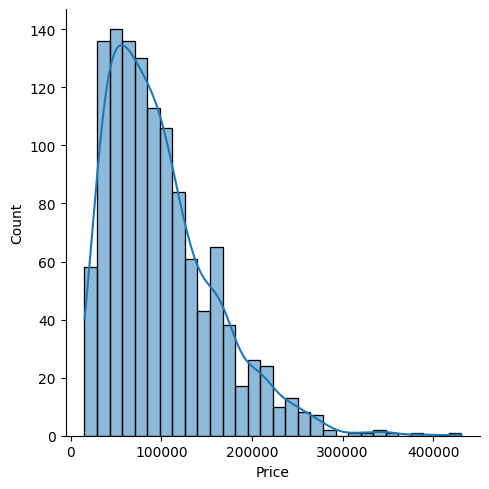

In [ ]:
sns.displot(x=df['Price'],kde=True)
plt.show()

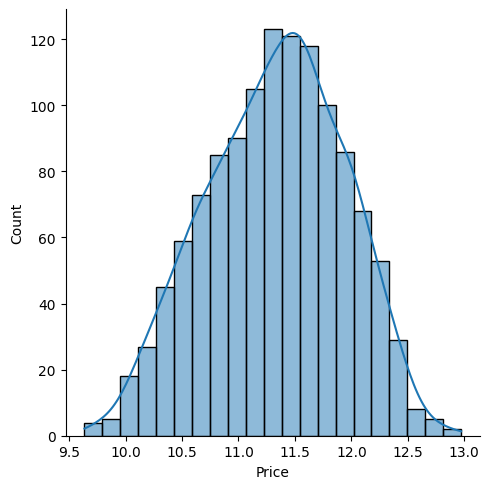

In [ ]:
sns.displot(x=np.log(df['Price']),kde=True)
plt.show()

In [ ]:
X=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [ ]:
df.to_csv("laptop_data_processed.csv",index=False)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [ ]:
X.shape

(1224, 12)

In [ ]:
X_train.shape

(1040, 12)

In [ ]:
X_test.shape

(184, 12)

In [ ]:
0.85*1224

1040.3999999999999

In [ ]:
1224-1040

184

In [ ]:
X

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,CPU,HDD,SSD,PPI
0,Apple,Ultrabook,8,Intel,Mac OS,1.37,0,1,Intel Core i5,0,128,226.98
1,Apple,Ultrabook,8,Intel,Mac OS,1.34,0,0,Intel Core i5,0,0,127.68
2,HP,Notebook,8,Intel,No OS,1.86,0,0,Intel Core i5,0,256,141.21
3,Apple,Ultrabook,16,AMD,Mac OS,1.83,0,1,Intel Core i7,0,512,220.53
4,Apple,Ultrabook,8,Intel,Mac OS,1.37,0,1,Intel Core i5,0,256,226.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,2 in 1 Convertible,4,Intel,Windows 10,1.80,1,1,Intel Core i7,0,128,157.35
1271,Lenovo,2 in 1 Convertible,16,Intel,Windows 10,1.30,1,1,Intel Core i7,0,512,276.05
1272,Lenovo,Notebook,2,Intel,Windows 10,1.50,0,0,Intel Core,0,0,111.94
1273,HP,Notebook,6,AMD,Windows 10,2.19,0,0,Intel Core i7,1000,0,100.45


In [ ]:
X_train

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,CPU,HDD,SSD,PPI
249,Apple,Ultrabook,8,Intel,Mac OS,1.37,0,1,Intel Core i5,0,512,226.98
453,Lenovo,Notebook,8,Intel,Windows 10,1.65,0,0,Intel Core i5,0,256,157.35
200,Dell,Gaming,16,Nvidia,Windows 10,2.65,0,1,Intel Core i7,1000,512,282.42
227,Asus,Notebook,8,Nvidia,Windows 10,2.00,0,0,Intel Core i5,0,256,141.21
189,Dell,Notebook,8,AMD,Windows 10,2.80,0,0,Intel Core i7,1000,128,127.34
...,...,...,...,...,...,...,...,...,...,...,...,...
1091,HP,Notebook,4,Intel,No OS,1.86,0,0,Intel Core i3,1000,0,100.45
1144,HP,2 in 1 Convertible,8,Intel,Windows 10,1.48,1,0,Intel Core i7,0,256,220.84
1179,HP,Notebook,4,Intel,Windows 10,2.07,0,0,Intel Core i3,500,0,100.45
903,Lenovo,Ultrabook,8,Intel,Windows 10,1.13,0,1,Intel Core i7,0,0,157.35


In [ ]:
y_train

249     12.097016
453     11.680463
200     11.996548
227     11.121408
189     11.465645
          ...    
1091    10.322724
1144    11.971299
1179    10.953295
903     12.101423
1175    11.121408
Name: Price, Length: 1040, dtype: float64

In [ ]:
X_test

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,CPU,HDD,SSD,PPI
691,Lenovo,Notebook,4,Intel,Windows 10,1.70,0,0,Intel Core i5,0,256,157.35
229,HP,Notebook,8,AMD,Windows 10,1.90,0,0,Intel Core i7,1000,0,141.21
158,Dell,2 in 1 Convertible,8,Intel,Windows 10,1.56,1,0,Intel Core i7,0,256,141.21
707,Lenovo,Workstation,16,Nvidia,Windows 7,2.18,0,0,Intel Core i7,0,512,141.21
956,Dell,2 in 1 Convertible,8,Intel,Windows 10,1.24,1,0,Intel Core i5,0,256,165.63
...,...,...,...,...,...,...,...,...,...,...,...,...
838,Lenovo,Notebook,4,Intel,Linux/Android/Chrome OS,1.50,0,0,Intel Core,0,0,111.94
637,Lenovo,Notebook,2,Intel,Windows 10,1.42,0,0,Intel Core,0,0,111.94
359,Dell,Notebook,8,Intel,Windows 10,1.36,0,0,Intel Core i5,0,256,157.35
1188,Dell,Ultrabook,8,Intel,Linux/Android/Chrome OS,1.23,1,0,Intel Core i5,0,256,276.05


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
# LinearRegression
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,4,8])
    ],remainder='passthrough')
step2=LinearRegression()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print("R2 score:",round(r2_score(y_test,y_pred),4))
print("MAE:",round(mean_absolute_error(y_test,y_pred),4))
print("MSE:",round(mean_squared_error(y_test,y_pred),4))

R2 score: 0.8039
MAE: 0.1984
MSE: 0.0619


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 249 to 1175
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1040 non-null   object 
 1   TypeName     1040 non-null   object 
 2   Ram          1040 non-null   int64  
 3   Gpu          1040 non-null   object 
 4   OpSys        1040 non-null   object 
 5   Weight       1040 non-null   float64
 6   Touchscreen  1040 non-null   int64  
 7   IPS          1040 non-null   int64  
 8   CPU          1040 non-null   object 
 9   HDD          1040 non-null   int64  
 10  SSD          1040 non-null   int64  
 11  PPI          1040 non-null   float64
dtypes: float64(2), int64(5), object(5)
memory usage: 105.6+ KB


In [ ]:
# LassoRegression
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,4,8])
    ],remainder='passthrough')
step2=Lasso(alpha=0.0001)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print("R2 score:",round(r2_score(y_test,y_pred),4))
print("MAE:",round(mean_absolute_error(y_test,y_pred),4))
print("MSE:",round(mean_squared_error(y_test,y_pred),4))

R2 score: 0.8041
MAE: 0.1981
MSE: 0.0619
